# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [3]:
# call_on_students(1)

#### Answer: 

- PCA is a dimensionality reduction technique meant to reduce the original data's number of features while preserving as much information as possible. Removes collinearity. The 1st Principal Component represents the most variance. 

- It uses eigenvectors and matrix multiplication reduces all the dimensions to 1 linear space

### 2: What are some reasons to use PCA?

In [4]:
# call_on_students(1)

#### Answer: 

- It allows our models run faster (increases speed of our models). Lessens the complexity and processing times needed for computation. 
- Allows us to visualize our model by reducing features. 
- Remove multi-collinearity.

- To prevent overfitting


### 3: Why is scaling important for PCA?

In [5]:
# call_on_students(1)

#### Answer: 

- PCA uses a covariance matrix, which is scaled in square units of the original variables, as opposed to a correlation matrix. This makes PCA very sensitive to the scale of the variables as squaring them increases their value exponentially.

- The magnitude of one feature will have an outsized affect on the variance 

- Need linear relaitonship to be on the same scale. 
- Will not perform well.

### 4: How can one determine how many principle components to use in a model?

In [6]:
# call_on_students(1)

#### Answer: 

- Pick a threshold of how much variance you want to preserve and use the PCA vectors that allow you to meet that threshold.
- Use PCA's n_components parameter with a float value to set the percent of variance you want to capture.
- You want to choose the number of Principal Components (PC) that capture the most variance when put together. Sometimes it is just the most dominant PC (First Principal Component) and sometimes it is a combination of the first and second PC or more. 


## PCA in Code

### Set Up

In [7]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- We need to scale our data.


In [8]:
# call_on_students(1)

In [9]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [10]:
# call_on_students(1)

In [47]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca= PCA(n_components=10)
# pca= PCA(n_components=.8) 80% variance

components = pca.fit_transform(X_scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [12]:
# call_on_students(1)

In [49]:
# Code here to answer the question
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

#### Answer:

- About 63% of the variance is explained by the first two components.


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [14]:
# call_on_students(1)

#### Answer:

-  The K-Means algorithm calculates the mean of all points belonging to a cluster and then moves the cluster to that mean. If other points are now closer to the new cluster center, the points are assigned to that cluster and the mean is caluclated again for the new cluster center until there is no movement.  


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [15]:
# call_on_students(1)

#### Answer:

- Inertia is measures the distance between each point within a cluster (intra-cluster). 
- Evaluate inertia with elbow plots
- We want low Inertia score

### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [16]:
# call_on_students(1)

#### Answer:

- Silhouette score (we want high) tries to maximize the similarity within the group and maximize distance between clusters.


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [17]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- Scale


In [18]:
# call_on_students(1)

In [19]:
# Code to preprocess the data
# Name the processed data X_processed
X_processed = StandardScaler().fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [20]:
# call_on_students(1)

In [21]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [51]:
# Fit the object
agg_clust = AgglomerativeClustering(n_clusters=2)
assigned_clust = agg_clust.fit(X_processed)

In [52]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, assigned_clust.labels_)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [24]:
# call_on_students(1)

In [25]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    assigned_clust = AgglomerativeClustering(n_clusters=n).fit(data)
    # Print the silhouette score
    print(n,":", silhouette_score(data, assigned_clust.labels_))
    # Return the labels attribute from the fit clustering model
    
    return assigned_clust.labels_

In [26]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

2 : 0.5770346019475988
3 : 0.4466890410285909
4 : 0.4006363159855973
5 : 0.33058726295230545
6 : 0.3148548010051283
7 : 0.31696983029912795
8 : 0.31094652900725794


# 3) Time Series

In [60]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- Set index to month and the data datatype to datetime.


In [61]:
# call_on_students(1)

In [62]:
# Code here 
ap['Month'] = pd.to_datetime(ap['Month'])

ap.set_index('Month', inplace=True)

ap

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 15: Explore Patterns in the Data

In [57]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Seasonality/periodicity
- Trends (Upwards or Downowards)
- Trends in variance (additive and multiplicative)
- Cyclic (unpredictable periods)


Second, plot this time series data. What kinds of patterns do you see in this dataset?

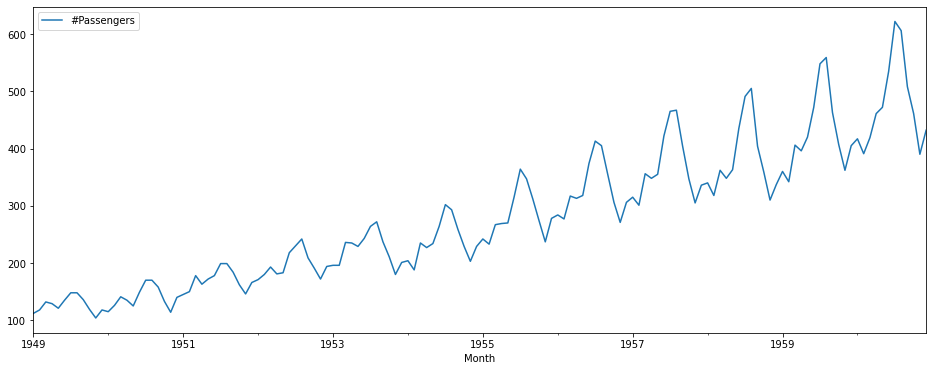

In [58]:
# Code to plot the time series
ap.plot(figsize = (16,6));

We see upwards trend in mean and variance as well as seasonality. 

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window of 12 would make sense as our data is in months over years.


In [ ]:
# call_on_students(1)

In [38]:
# Code to create the moving average
rolling_mean = ap.rolling(window=12).mean()
rolling_mean.dropna(inplace=True)

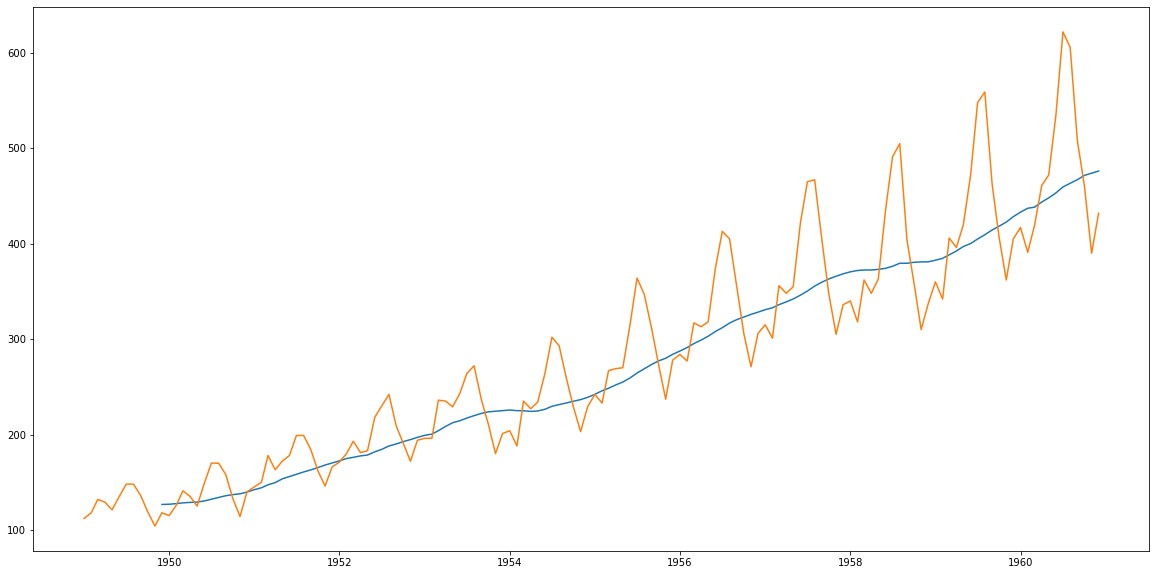

In [63]:
# Add to the moving average to the above plot
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(rolling_mean)
plt.plot(ap);

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- Model performs better on stationary data because it helps the model focus on the part that actually needs predicting. 
- No variance between data points over time. Mean of zero.

What can we do to make our data stationary?

- Differencing- subtract previous value from current one (that's one difference)
- Subtract rolling mean/avg from values
- Log transform or other straight mathematical transformations


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [64]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(ap)

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Not stationary. The second value 0.99 is the p-value and it is higher than 0.05 and we cannot reject the null that the data is nt statnionary.

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [73]:
# Code here to try to make the data stationary
diff_ap = ap.diff().dropna()
diff_ap

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [74]:
# Code here to check if the data is stationary
adfuller(diff_ap)

(-2.8292668241700056,
 0.054213290283824704,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

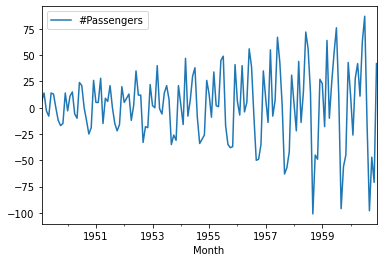

In [77]:
diff_ap.plot();

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [78]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. Lowercase (standardize case)
2. Remove stopwords (really common words that likely have no semantic value)
3. Stem or lemmatize to remove prefixes/suffixes/grammar bits
4. Remove punctuation
5. Tokenize (Counts)

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Columns: every word/token in the dataset/corpus
- Row: the documents you are vectorizing


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- TF-IDF: term frequency inverse document frequency
- TF-IDF is a vectorizer that takes into account the rarity of words 
- How important is a word to a identifying a document. (Inverse means we give more weight to uncommon/infrequent words).


## NLP in Code

### Set Up

In [5]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [6]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [7]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [8]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Instantiate it
vectorizer = CountVectorizer()

In [10]:
# Fit it
vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [11]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train_vec, y_train)

RandomForestClassifier()

In [13]:
# Code here to evaluate your model on the test set
rfc.score(X_test_vec, y_test)

0.9375